In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop("class", axis=1)

In [6]:
X = pd.get_dummies(X, drop_first = True)

In [7]:
y = df["class"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {"n_estimators": [50, 100],
              "learning_rate": [0.1, 0.05, 0.2],
              "max_depth": [3, 4, 5]}

In [18]:
gb_model = GradientBoostingClassifier()

In [19]:
grid = GridSearchCV(gb_model, param_grid)

In [20]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [23]:
preds = grid.predict(X_test)

In [24]:
preds

array(['p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e',
       'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'e', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e',
       'p', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'p', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p

In [25]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [33]:
feats = pd.DataFrame(index = X.columns, data = grid.best_estimator_.feature_importances_, columns = ["Importance"]).sort_values("Importance", ascending=False)

In [35]:
imp_feats = feats[feats["Importance"] > 0.0005]

c:\Users\kokye\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kokye\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kokye\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


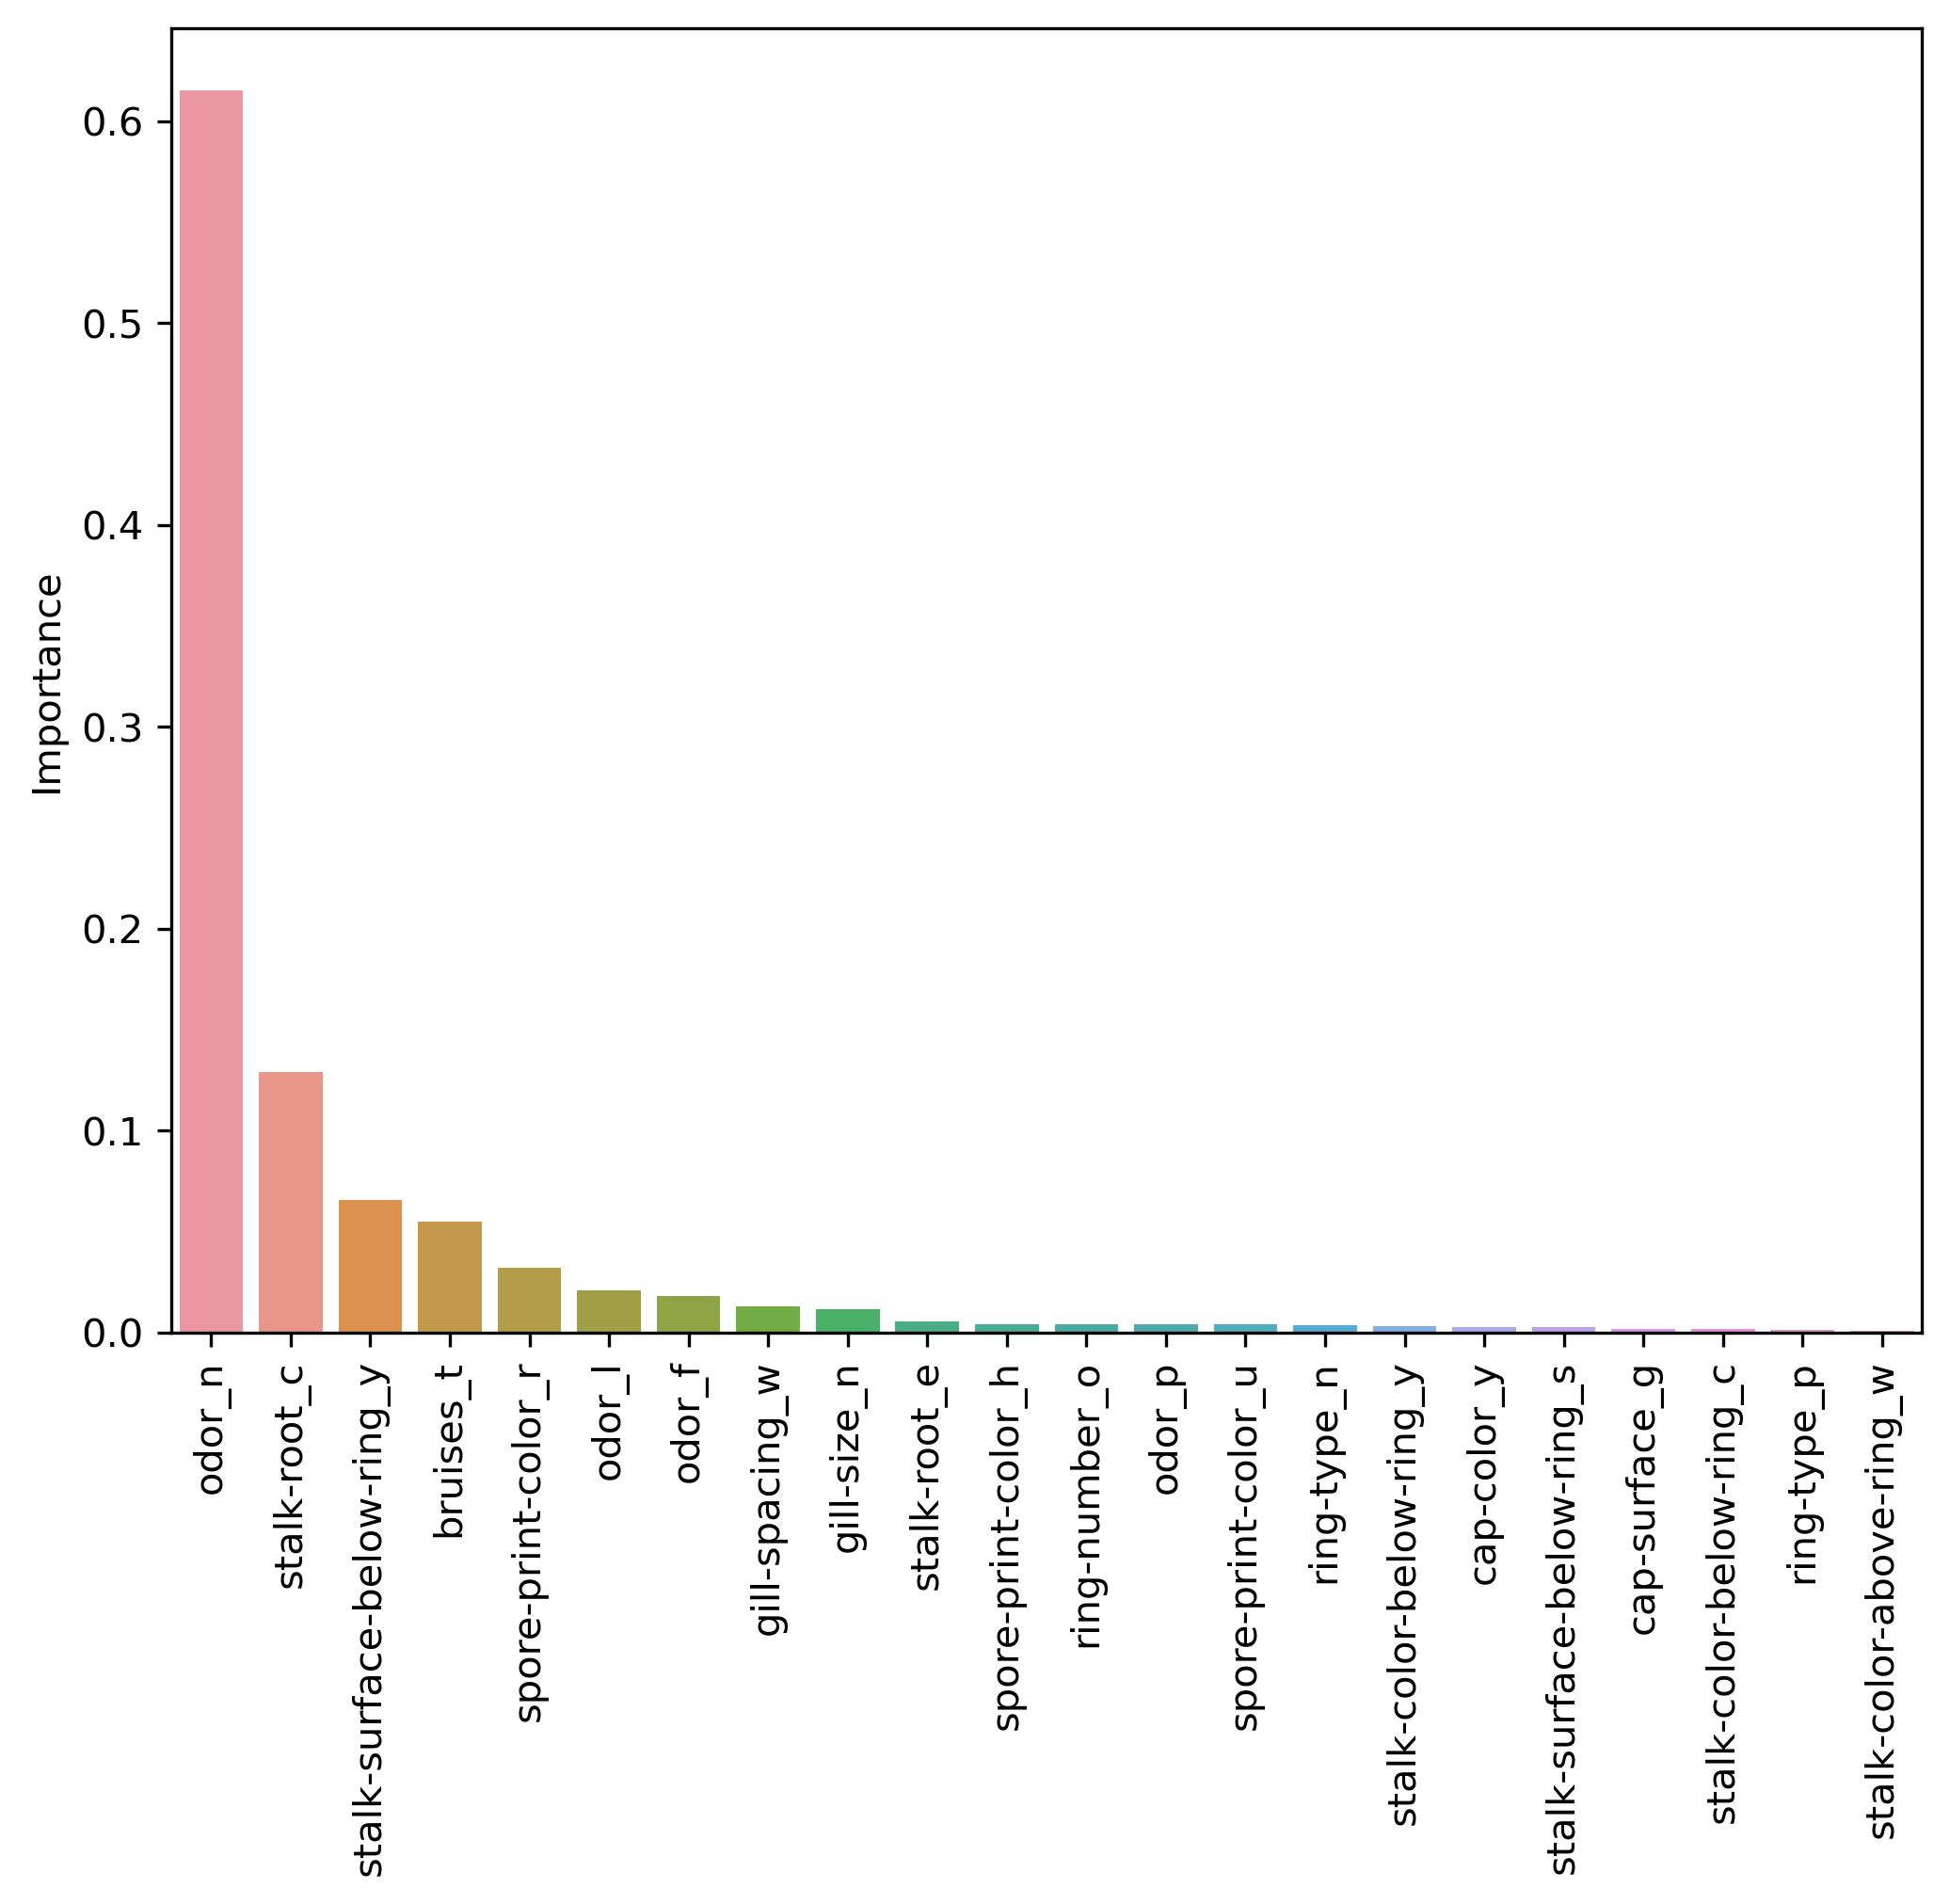

In [38]:
plt.figure(figsize = (8, 6), dpi=300)
sns.barplot(data = imp_feats, x = imp_feats.index, y = "Importance")
plt.xticks(rotation=90);